/content/drive/MyDrive/SpatialSoundProject/balloon_data


<ipython-input-3-36d7475556d3>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wav.read('single_balloon_southwest.wav') #change the audio file here


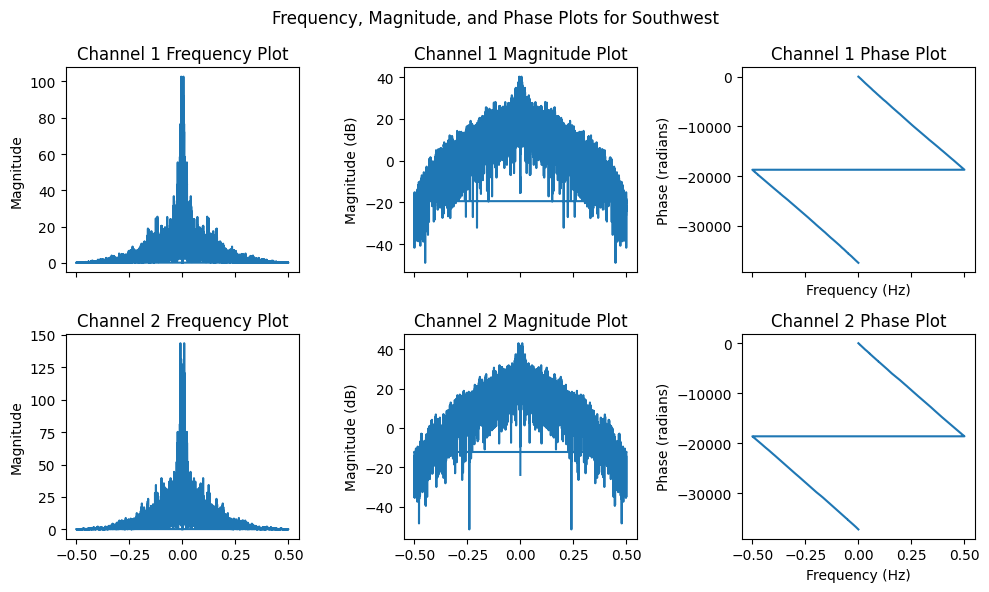

In [ ]:
# -------------------------FREQUENCY PHASE MAGNITUDE PLOT GENERATOR ------------
%cd '/content/drive/MyDrive/SpatialSoundProject/balloon_data/'
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

# Load the .wav file and get the audio data
sample_rate, audio_data = wav.read('single_balloon_southwest.wav') #change the audio file here

# Split the audio data into separate channels
num_channels = audio_data.shape[1]
channel_data = [audio_data[:, i] for i in range(num_channels)]

# Create a figure with subplots for the frequency, magnitude, and phase data for all channels
fig, axs = plt.subplots(num_channels, 3, figsize=(10, 6), sharex='col')

# Plot the frequency, magnitude, and phase data for each channel
for i in range(num_channels):
    # Compute the fast Fourier transform (FFT) of the audio data
    fft_data = np.fft.fft(channel_data[i])

    # Compute the frequency bins for the FFT
    freq_bins = np.fft.fftfreq(len(fft_data))

    # Compute the magnitude and phase of the FFT data
    magnitude = np.abs(fft_data)
    phase = np.unwrap(np.angle(fft_data))

    # Frequency plot
    axs[i, 0].plot(freq_bins, magnitude)
    axs[i, 0].set_title(f'Channel {i+1} Frequency Plot')
    axs[i, 0].set_ylabel('Magnitude')

    # Magnitude plot
    axs[i, 1].plot(freq_bins, 20*np.log10(magnitude))
    axs[i, 1].set_title(f'Channel {i+1} Magnitude Plot')
    axs[i, 1].set_ylabel('Magnitude (dB)')

    # Phase plot
    axs[i, 2].plot(freq_bins, phase)
    axs[i, 2].set_title(f'Channel {i+1} Phase Plot')
    axs[i, 2].set_ylabel('Phase (radians)')
    axs[i, 2].set_xlabel('Frequency (Hz)')

# Set the x-axis label for the bottom subplot
axs[num_channels-1, 2].set_xlabel('Frequency (Hz)')

# Set the y-axis label for the left-most subplots
for ax in axs[:, 0]:
    ax.set_ylabel('Magnitude')

# Add a title to the figure
fig.suptitle('Frequency, Magnitude, and Phase Plots for Southwest')

plt.tight_layout()
plt.show()


#    north_wav_file = 'single_balloon_north.wav'
 #   east_wav_file = 'single_balloon_east.wav'
#    south_wav_file = 'single_balloon_south.wav'
 #   west_wav_file = 'single_balloon_west.wav'
#    ne_wav_file = 'single_balloon_northeast.wav'
#    nw_wav_file = 'single_balloon_northwest.wav'
 #   se_wav_file = 'single_balloon_southeast.wav'
#    sw_wav_file = 'single_balloon_southwest.wav'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --------------------- ITD / ILD VALUE GENERATOR ------------------------------
%cd '/content/drive/MyDrive/SpatialSoundProject/balloon_data/'
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

def compute_ild(left_channel, right_channel):
    left_power = np.mean(left_channel ** 2)
    right_power = np.mean(right_channel ** 2)
    ild = 10 * np.log10(left_power / right_power)
    return ild

def compute_itd(left_channel, right_channel, sample_rate):
    cross_correlation = np.correlate(left_channel, right_channel, mode='full')
    max_corr_index = np.argmax(cross_correlation)
    time_shift = max_corr_index - len(left_channel) + 1
    itd = time_shift / sample_rate
    return itd

def analyze_wav_file(filename):
    sample_rate, audio_data = wavfile.read(filename)
    left_channel = audio_data[:, 0]
    right_channel = audio_data[:, 1]

    ild = compute_ild(left_channel, right_channel)
    itd = compute_itd(left_channel, right_channel, sample_rate)

    return ild, itd

def main():
    north_wav_file = 'single_balloon_north.wav'
    east_wav_file = 'single_balloon_east.wav'
    south_wav_file = 'single_balloon_south.wav'
    west_wav_file = 'single_balloon_west.wav'
    ne_wav_file = 'single_balloon_northeast.wav'
    nw_wav_file = 'single_balloon_northwest.wav'
    se_wav_file = 'single_balloon_southeast.wav'
    sw_wav_file = 'single_balloon_southwest.wav'

    north_ild, north_itd = analyze_wav_file(north_wav_file)
    east_ild, east_itd = analyze_wav_file(east_wav_file)
    south_ild, south_itd = analyze_wav_file(south_wav_file)
    west_ild, west_itd = analyze_wav_file(west_wav_file)
    ne_ild, ne_itd = analyze_wav_file(ne_wav_file)
    nw_ild, nw_itd = analyze_wav_file(nw_wav_file)
    se_ild, se_itd = analyze_wav_file(se_wav_file)
    sw_ild, sw_itd = analyze_wav_file(sw_wav_file)

    print(f"North ILD: {north_ild} dB, North ITD: {north_itd} s")
    print(f"East ILD: {east_ild} dB, East ITD: {east_itd} s")
    print(f"South ILD: {south_ild} dB, South ITD: {south_itd} s")
    print(f"West ILD: {west_ild} dB, West ITD: {west_itd} s")
    print(f"North East ILD: {ne_ild} dB, North East ITD: {ne_itd} s")
    print(f"North West ILD: {nw_ild} dB, North West ITD: {nw_itd} s")
    print(f"South East ILD: {se_ild} dB, South East ITD: {se_itd} s")
    print(f"South West ILD: {sw_ild} dB, South West ITD: {sw_itd} s")

if __name__ == '__main__':
    main()



/content/drive/MyDrive/SpatialSoundProject/balloon_data


<ipython-input-4-0dc19b96fd11>:21: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(filename)


North ILD: -1.922931969165802 dB, North ITD: 0.0 s
East ILD: 1.3773460686206818 dB, East ITD: -2.0833333333333333e-05 s
South ILD: -2.045888304710388 dB, South ITD: 0.0 s
West ILD: -5.9534752368927 dB, West ITD: -2.0833333333333333e-05 s
North East ILD: 0.3517654538154602 dB, North East ITD: -2.0833333333333333e-05 s
North West ILD: -3.2634425163269043 dB, North West ITD: 2.0833333333333333e-05 s
South East ILD: 0.8375445008277893 dB, South East ITD: -6.25e-05 s
South West ILD: -3.8849815726280212 dB, South West ITD: 4.1666666666666665e-05 s


North ILD: -1.922931969165802 dB, North ITD: 0.0 s

---


East ILD: 1.3773460686206818 dB, East ITD: -2.0833333333333333e-05 s


---


South ILD: -2.045888304710388 dB, South ITD: 0.0 s


---


West ILD: -5.9534752368927 dB, West ITD: -2.0833333333333333e-05 s


---


North East ILD: 0.3517654538154602 dB, North East ITD: -2.0833333333333333e-05 s


---


North West ILD: -3.2634425163269043 dB, North West ITD: 2.0833333333333333e-05 s


---


South East ILD: 0.8375445008277893 dB, South East ITD: -6.25e-05 s


---


South West ILD: -3.8849815726280212 dB, South West ITD: 4.1666666666666665e-05 s


---



In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ---------------------- ALGORITHM #1: APPLICATION OF ITD/ILD ------------------
%cd '/content/drive/MyDrive/SpatialSoundProject/raw_data/'
import numpy as np
import scipy.io.wavfile as wavfile
from pydub import AudioSegment
import warnings
warnings.filterwarnings("ignore", category=wavfile.WavFileWarning)

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def estimate_input_direction(ild, itd, known_directions):
    min_distance = float('inf')
    closest_direction = None

    for direction, values in known_directions.items():
        distance = euclidean_distance((ild, itd), values)
        if distance < min_distance:
            min_distance = distance
            closest_direction = direction

    return closest_direction

def apply_ild_itd(audio_data, ild, itd, sample_rate):
    # Compute the time delay based on ITD
    time_delay = int(itd * sample_rate)
    
    # Shift the left channel by the time delay
    if time_delay > 0:
        audio_data[:, 0] = np.concatenate((audio_data[time_delay:, 0], np.zeros((time_delay,))))
    elif time_delay < 0:
        audio_data[:, 0] = np.concatenate((np.zeros((-time_delay,)), audio_data[:time_delay, 0]))
    
    # Scale the audio data based on ILD
    ild_factor = 10 ** (ild / 20)
    audio_data[:, 0] *= ild_factor  # Left channel
    audio_data[:, 1] /= ild_factor  # Right channel
    
    return audio_data




def save_wav_file(filename, audio_data, sample_rate, original_dtype):
    wavfile.write(filename, sample_rate, audio_data.astype(original_dtype))


def compute_ild(left_channel, right_channel):
    left_power = np.mean(left_channel ** 2)
    right_power = np.mean(right_channel ** 2)
    ild = 10 * np.log10(left_power / right_power)
    return ild


def compute_itd(left_channel, right_channel, sample_rate):
    cross_correlation = np.correlate(left_channel, right_channel, mode='full')
    max_corr_index = np.argmax(cross_correlation)
    time_shift = max_corr_index - len(left_channel) + 1
    itd = time_shift / sample_rate
    return itd

def analyze_wav_file(filename):
    sample, audio = wavfile.read(filename)
    left_channel = audio[:, 0]
    right_channel = audio[:, 1]

    ild = compute_ild(left_channel, right_channel)
    itd = compute_itd(left_channel, right_channel, sample)

    return ild, itd

def main():
    input_file_name = "rr_southwest.wav"
    sample_rate, audio_data = wavfile.read(input_file_name)
    audio_data = audio_data.astype(np.float32)
    left_channel = audio_data[:, 0]
    right_channel = audio_data[:, 1]

    # ILD and ITD values for the input direction (assuming they have been calculated)
    input_ild, input_itd = analyze_wav_file(input_file_name)

    print("ILD and ITD")
    print(input_ild, input_itd)

    # Dictionary of known directions with corresponding ILD and ITD values
    known_directions = {
        'north': (-1.9229315221309662, 0.0),
        'east': (1.3773463666439056, -2.0833333333333333e-05),
        'south': (-2.045888751745224, 0.0),
        'west': (-5.9534752368927, -2.0833333333333333e-05),
        'northeast': (0.3517654538154602, -2.0833333333333333e-05),
        'northwest': (-3.2634425163269043, -2.0833333333333333e-05),
        'southeast': (0.8375445008277893, -6.25e-05),
        'southwest': (-3.884981870651245, 4.1666666666666665e-05),
        
    }

    # Estimate input direction
    input_direction = estimate_input_direction(input_ild, input_itd, known_directions)

    print(input_direction)

    # Inverse transformation to bring sound to the center
    inverse_ild = -known_directions[input_direction][0]
    inverse_itd = -known_directions[input_direction][1]
    print("inverse ild itd")
    print(inverse_ild, inverse_itd)
    centered_audio = apply_ild_itd(audio_data, inverse_ild, inverse_itd, sample_rate)

    # Desired direction for the output audio
    desired_direction = 'northeast'  # Change to the desired output direction
    desired_ild = known_directions[desired_direction][0]
    desired_itd = known_directions[desired_direction][1]

    # Apply the desired transformation
    modified_audio_data = apply_ild_itd(centered_audio, desired_ild, desired_itd, sample_rate)
    output_file_name = "output_" + input_direction + "_to_" + desired_direction + ".wav"
    save_wav_file(output_file_name, modified_audio_data, sample_rate, audio_data.dtype)

if __name__ == "__main__":
    main()

/content/drive/MyDrive/SpatialSoundProject/raw_data
ILD and ITD
-3.874298632144928 4.1666666666666665e-05
southwest
inverse ild itd
3.884981870651245 -4.1666666666666665e-05


Computational Pinna-Gain Model using Notch Filter at 6.2 KHz, 8.0 Khz, 8.7 Khz, and 12 Khz:

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as signal

def calculate_notch_magnitudes(elevation):
    # Define the notch filter frequencies and their corresponding magnitudes
    notch_frequencies = [6200, 8000, 8700, 12000]  # Frequencies in Hz
    max_magnitudes = [1.0, 0.5, 0.4, 0.2]  # Corresponding maximum magnitudes

    # Define the elevation range (in degrees) where the magnitudes change
    min_elevations = [-45, -30, -15, 0]  # Minimum elevation for each notch filter
    max_elevations = [-30, -15, 0, 45]  # Maximum elevation for each notch filter

    # Calculate the notch filter magnitudes based on the elevation angle
    notch_magnitudes = []
    for i, freq in enumerate(notch_frequencies):
        max_mag = max_magnitudes[i]
        min_elev = min_elevations[i]
        max_elev = max_elevations[i]

        if elevation <= min_elev:
            mag = max_mag
        elif elevation >= max_elev:
            mag = 1.0
        else:
            slope = (1.0 - max_mag) / (max_elev - min_elev)
            mag = max_mag + slope * (elevation - min_elev)

        notch_magnitudes.append(mag)

    return notch_magnitudes

# Load the audio file
input_file_name = 'rr_southwest'
filename = input_file_name + '.wav'
rate, y = wav.read(filename)

# Define the elevation angle (in degrees)
elevation = 15

# Define the sampling frequency
fs = rate

# Calculate the notch filter magnitudes based on the elevation angle
notch_magnitudes = calculate_notch_magnitudes(elevation)

# Create a notch filter for each frequency range using the calculated magnitudes
notch_filters = []
notch_frequencies = [6200, 8000, 8700, 12000]  # Frequencies in Hz
for i, freq in enumerate(notch_frequencies):
    magnitude = notch_magnitudes[i]
    b, a = signal.iirnotch(freq, 30, fs, True)
    b *= magnitude
    a *= magnitude
    notch_filters.append((b, a))

# Apply the notch filters to the signal
y_notch = y.copy()
for b, a in notch_filters:
    y_notch = signal.filtfilt(b, a, y_notch)

output_file = "output_pinna_" + input_file_name + "_to_" + elevation + ".wav"
# Write the filtered audio to a new file
wav.write(output_file, rate, y_notch.astype(np.int16))


Vertical Head Shadow

In [ ]:
%cd '/content/drive/MyDrive/SpatialSoundProject/raw_data/'
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def create_vertical_attenuation_model(fs, elevation, order=4, alpha=1):
    """
    Creates a model of the vertical head shadow effect using spherical harmonics.

    Parameters:
    fs (float): The sample rate in Hz.
    elevation (float): The elevation angle in degrees.
    order (int): The order of the spherical harmonics to use. Default is 4.
    alpha (float): The power law for the angular frequency weighting. Default is 1.

    Returns:
    ndarray: The filter coefficients of the vertical attenuation model.
    """

    # Convert the elevation angle to radians
    theta = np.deg2rad(elevation)

    # Generate the spherical harmonics for the elevation angle
    sph_harm = np.zeros((order + 1, 2 * order + 1))
    for n in range(order + 1):
        for m in range(-n, n + 1):
            if m < 0:
                sph_harm[n, m + order] = -np.sqrt(2) * np.power(-1.0, m) * np.sin(theta * m) * np.math.factorial(n - m) / np.math.factorial(n + m)
            elif m == 0:
                sph_harm[n, m + order] = np.power(-1, m) * np.cos(theta * m) * np.math.factorial(2 * n) / np.power(np.math.factorial(n), 2)
            else:
                sph_harm[n, m + order] = np.sqrt(2) * np.power(-1, m) * np.cos(theta * m) * np.math.factorial(n - m) / np.math.factorial(n + m)

    # Generate the coefficients for the vertical attenuation filter
    coeffs = np.zeros(2 * order + 1)
    coeffs[0] = 1
    coeffs[1:] = np.power(np.arange(1.0, 2 * order + 1), -alpha)
    coeffs = coeffs[:, np.newaxis]

    # Combine the spherical harmonics and the vertical attenuation coefficients
    filter_coeffs = np.dot(sph_harm, coeffs).squeeze()

    # Normalize the filter coefficients
    filter_coeffs /= np.sum(filter_coeffs)

    return filter_coeffs

def apply_vertical_attenuation_model(input_file, output_file, elevation, order=4, alpha=1):
    # Load the audio file
    fs, audio = wavfile.read(input_file)
    
    # Compute the vertical attenuation filter
    filter_coeffs = create_vertical_attenuation_model(fs, elevation, order=order, alpha=alpha)
    
    # Apply the filter to each channel of the audio
    filtered_audio = np.zeros_like(audio)
    for channel_idx in range(audio.shape[1]):
        filtered_audio[:, channel_idx] = np.convolve(audio[:, channel_idx], filter_coeffs, mode='same')
    
    # Normalize the filtered audio to prevent clipping
    filtered_audio = filtered_audio / np.max(np.abs(filtered_audio))
    
    # Write the filtered audio to a WAV file
    wavfile.write(output_file, fs, filtered_audio)

    def main():
      # Define parameters
      fs = 48000  # Sampling rate
      order = 6  # Order of spherical harmonics
      alpha = 2  # Exponent for decay of coefficients
      elevation = 15  # Elevation angle in degrees
      
      # Generate elevation filter
      elevation_filter = create_vertical_attenuation_model(fs, elevation, order=order, alpha=alpha)
      
      # Plot frequency response of filter
      freq_response = np.abs(np.fft.fft(elevation_filter, n=2**16))
      freq_axis = np.linspace(0, fs, len(freq_response), endpoint=False)
      plt.plot(freq_axis, 20*np.log10(freq_response))
      plt.xlabel('Frequency (Hz)')
      plt.ylabel('Magnitude (dB)')
      plt.title(f'Elevation Filter: {elevation} Degrees')
      plt.show()

      # run the code
      input_file_name = 'rr_southwest'
      input_file = input_file_name + '.wav'
      elevation = 15 # degrees
      order = 4
      alpha = 1
      output_file = "output_hs_" + input_file_name + "_to_" + elevation + ".wav"

      apply_vertical_attenuation_model(input_file, output_file, elevation, order, alpha)

if __name__ == '__main__':
      main()


In [ ]:
#Load an HRTF dataset (e.g., from the 3D3A Lab at Princeton University) in SOFA format.
#Find the nearest HRTF measurements to your desired parameters (azimuth and elevation angles).
#If necessary, interpolate the HRTF to obtain a smoother transfer function.
#Apply the HRTF transfer function to your audio signal.
#the dataset was too large to upload so provided a snipped of the code and describe what it does
import numpy as np
from scipy.io import wavfile
from scipy.signal import fftconvolve
import pysofaconventions as pysofa
import soundfile as sf

def load_sofa_file(file_path):
    return pysofa.SOFAFile(file_path, 'r')

def get_hrir(sofa, azimuth, elevation):
    idx = sofa.get_nearest_position(azimuth, elevation)
    hrir_left = sofa.getDataIR()[idx, 0, :]
    hrir_right = sofa.getDataIR()[idx, 1, :]
    return hrir_left, hrir_right

def apply_hrtf(input_audio, hrir_left, hrir_right):
    output_left = fftconvolve(input_audio, hrir_left, mode='full')
    output_right = fftconvolve(input_audio, hrir_right, mode='full')
    return np.array([output_left, output_right]).T

def apply_custom_hrtf(input_audio_path, output_audio_path, sofa_file_path, azimuth, elevation):
    input_audio, samplerate = sf.read(input_audio_path)

    # Load the SOFA file
    sofa = load_sofa_file(sofa_file_path)

    # Get HRIR for the given azimuth and elevation
    hrir_left, hrir_right = get_hrir(sofa, azimuth, elevation)

    # Apply HRTF to the input audio
    output_audio = apply_hrtf(input_audio, hrir_left, hrir_right)

    # Save the output audio
    sf.write(output_audio_path, output_audio, samplerate)

# Example
input_audio_path = 'input_audio.wav'
output_audio_path = 'output_audio.wav'
sofa_file_path = 'path/to/sofa/file.sofa'

azimuth = 30 # Desired azimuth angle
elevation = 0 # Desired elevation angle

apply_custom_hrtf(input_audio_path, output_audio_path, sofa_file_path, azimuth, elevation)

